In [ ]:
# source bin/activate the venv first, then pip3 install ipykernel (the jupyternotebook kernel is created
# based on the current active env, hence sourcing first). name=whatever, the important thing is that it WILL 
# auto update the notebook + packages. (pip3 install seaborn in sourced cmdline makes seaborn appear in the 
# pip freeze in the notebook)

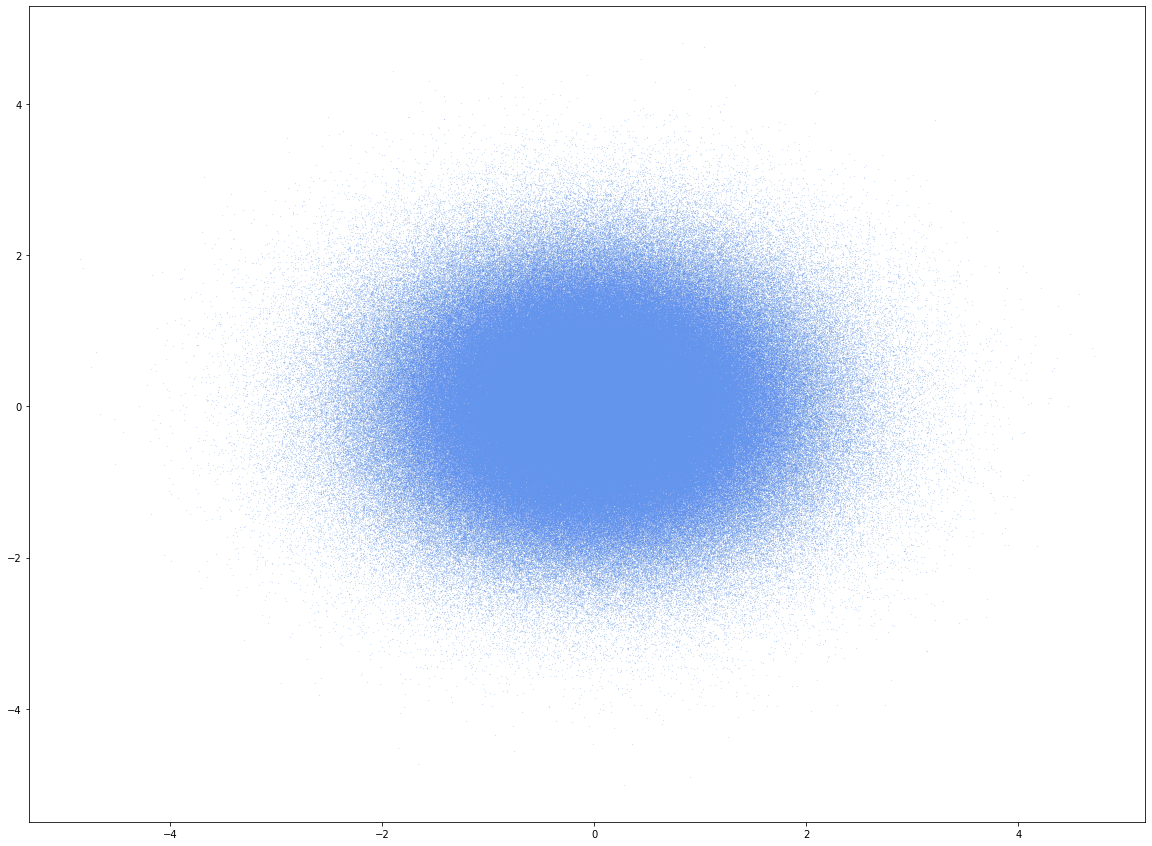

In [650]:
plt.figure(figsize=(20,15))
plt.scatter(pop_million_points[:,0], pop_million_points[:,1], s=.01, color='cornflowerblue')
plt.show()

In [604]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [631]:
np.random.seed(0)

In [632]:
pop_million_points, ignore_classes = make_gaussian_quantiles(n_samples=1000000, n_features = 2, cov=1, n_classes=1)

In [633]:
under_1_pop = 0
for i in pop_million_points:
    if -1 <= i[0] <= 1:
        under_1_pop += 1

In [654]:
rand10 = np.random.choice(range(1000000), 10)
sample10 = np.array([pop_million_points[i] for i in rand10])

In [635]:
under_1_std_10 = 0
over_1_std_10 = 0
for i in sample10:
    if -1 <= i[0] <= 1:
        under_1_std_10 += 1
    else: 
        over_1_std_10 += 1

In [636]:
under_1_std_10

8

In [637]:

over_1_std_10

2

In [638]:
rand100 = np.random.choice(range(1000000), 100)
sample100 = np.array([pop_million_points[i] for i in rand100])

In [639]:
under_1_std_100 = 0
over_1_std_100 = 0
for i in sample100:
    if -1 <= i[0] <= 1:
        under_1_std_100 += 1
    else: 
        over_1_std_100 += 1

In [640]:
under_1_std_100

59

In [641]:
over_1_std_100

41

# Proof that increasing sample size increases standard deviation, which converges to the true population standard deviation. Bessel's correction helps smaller samples get larger standard deviations than they would otherwise, hence N-1.

## Sample mean gets closer to true population mean with larger sample. This should be intuitive.  Larger samples contain more points from the population. In a normally distributed population, points close to the mean are more common than points farther away from the mean. Therefore, larger samples will have *a more frequent opportunity, because of those greater encounters with unbiased points, to counteract their biased points*, and so larger samples will have a sample mean closer to the true population mean.  

In [678]:
rand10 = np.random.choice(range(1000000), 10)
sample10 = np.array([pop_million_points[i] for i in rand10])
sample10[:,0].mean()


0.41049551175783394

In [643]:
sample100[:,0].mean()

-0.08053827896793869

In [644]:
points[:,0].mean()

-0.0012327895979428686

## Standard deviation increases, getting closer to the true standard deviation (which in this case is 1.0, for the Normal distribution) as sample size gets larger. This is still intuitive, but may take longer to contemplate.

In [681]:
np.std(sample10[:,0], ddof=0)

0.7930216411235183

In [661]:
np.std(sample100[:,0])

1.0971644104709648

In [684]:
np.std(points[:,0])

0.9999963356185759

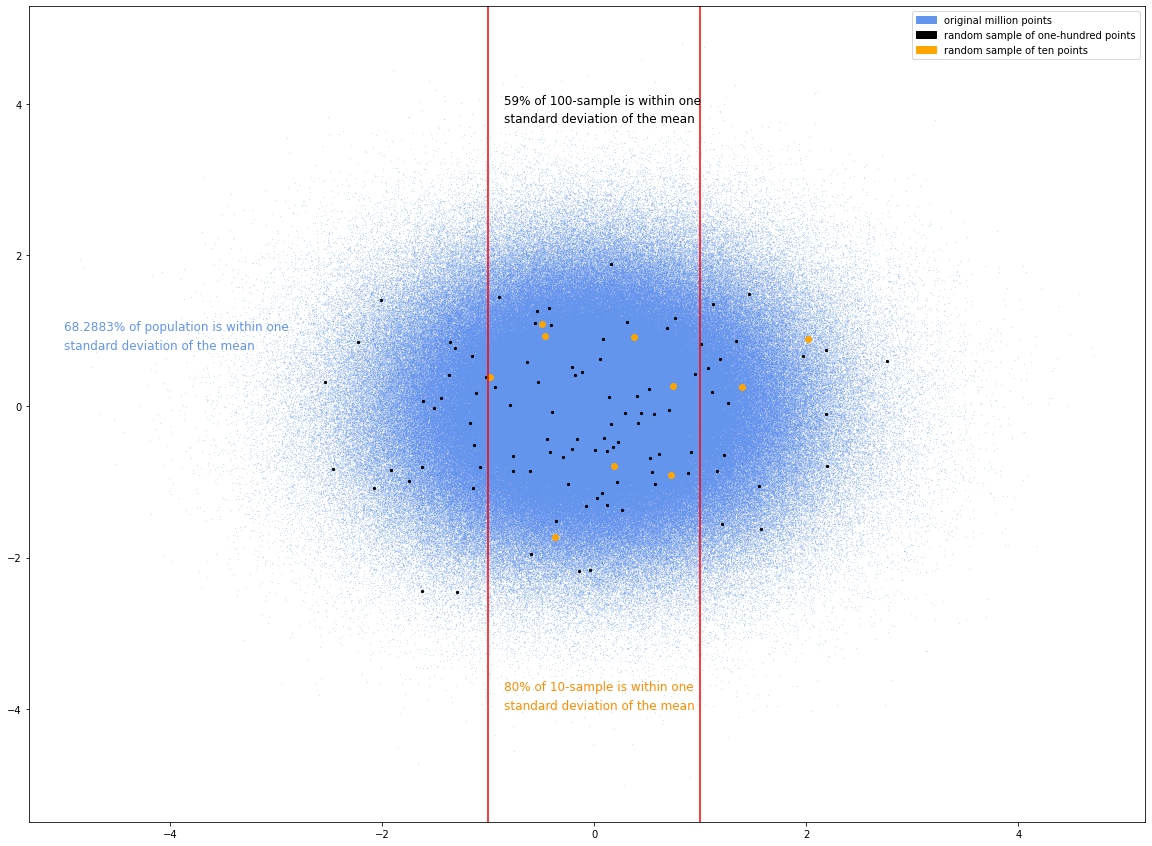

In [648]:
plt.figure(figsize=(20,15))
plt.scatter(pop_million_points[:,0], pop_million_points[:,1], s=.01, color='cornflowerblue')
plt.scatter(sample100[:, 0], sample100[:,1], color='black', s=5)
plt.scatter(sample10[:,0], sample10[:,1], color='orange', s=35)
plt.axvline(x=-1, color='red')
plt.axvline(x=1, color='red')

blue_patch = mpatches.Patch(color='cornflowerblue', label='original million points')
black_patch = mpatches.Patch(color='black', label='random sample of one-hundred points')
orange_patch = mpatches.Patch(color='orange', label='random sample of ten points')
plt.legend(handles=[blue_patch, black_patch, orange_patch])

plt.text(-.85, 4, f'{under_1_std_100}% of 100-sample is within one', fontsize=12)
plt.text(-.85, 3.75, 'standard deviation of the mean', fontsize=12)

plt.text(-.85, -3.75, f'{under_1_std_10*10}% of 10-sample is within one', fontsize=12, color='darkorange')
plt.text(-.85, -4, 'standard deviation of the mean', fontsize=12, color='darkorange')

plt.text(-5, 1, f'{under_1_pop/10000}% of population is within one', fontsize=12, color='cornflowerblue')
plt.text(-5, .75, 'standard deviation of the mean', fontsize=12, color='cornflowerblue')

plt.show()

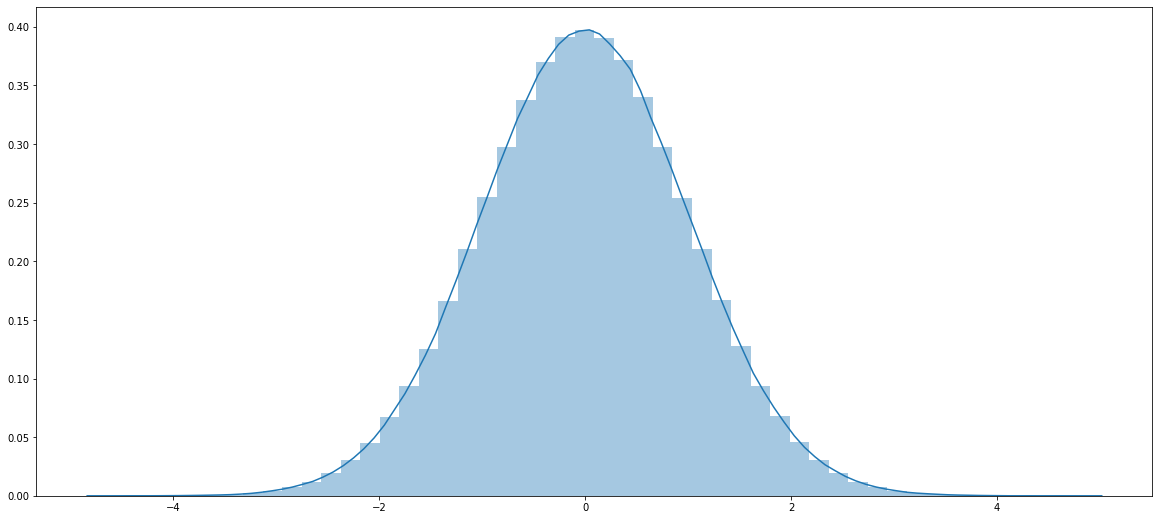

In [649]:
plt.figure(figsize=(20,9))
sns.distplot(points[:,1])
plt.show()

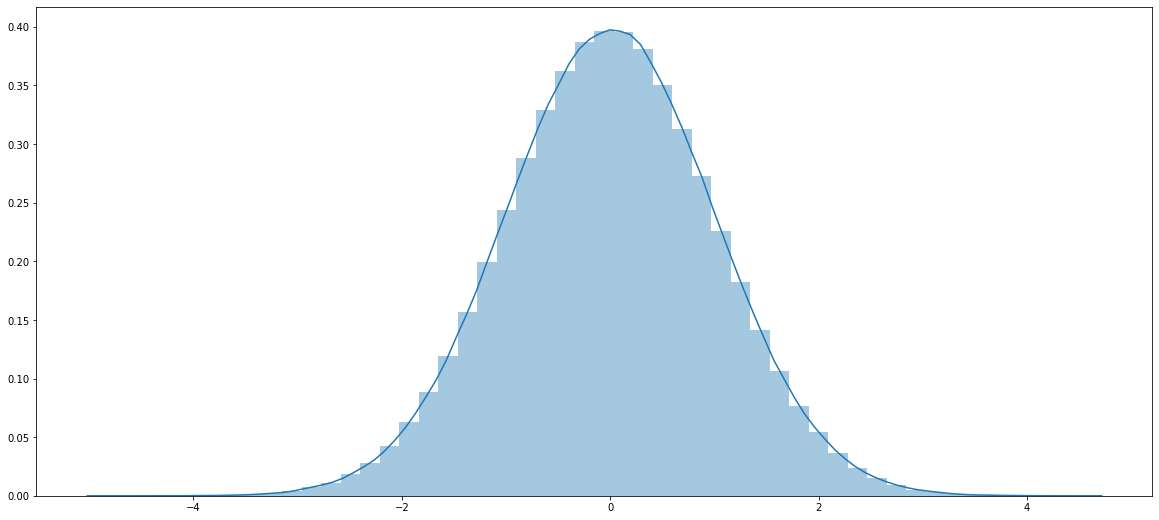

In [244]:
plt.figure(figsize=(20,9))
sns.distplot(points[:,0])
plt.show()

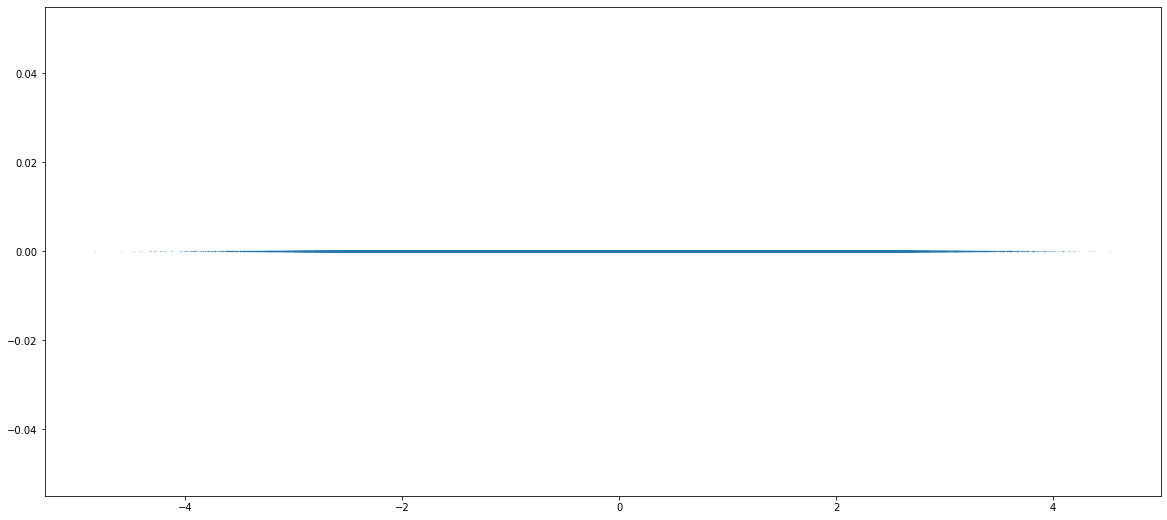

In [245]:
plt.figure(figsize=(20,9))
plt.scatter(points[:,0], np.zeros(1000000), s=.01)
plt.show()